In [12]:
import transformers
import torch
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv('bank_reviews3.csv')
df_used = df[['bank', 'review']]
df_used

,bank,review
0,SBI,State Bank Of India is located nearby in our a...
1,SBI,"I have my salary account in SBI, when I applie..."
2,Axis Bank,I am using Axis bank saving account for the p...
3,HDFC Bank,I have my salary bank account in HDFC bank for...
4,review,"Close to around 10 years, I am holding this Co..."
...,...,...
995,review,I am holding a saving account with FEDERAL ban...
996,Axis Bank,There is no mandatory balance to keep in my Ax...
997,Axis Bank,"In Axis bank, every month they are charging me..."
998,Axis Bank,I have a salary account with AXIS bank and I h...


In [14]:
df_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bank    1000 non-null   object
 1   review  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


## Building model using BERT NEURAL NETWORK BERT NERUAL NETWORK and the Hugging Face Transformers library to classify the sentiment of text

In [15]:
from transformers import pipeline
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained('distilbert/distilbert-base-uncased-finetuned-sst-2-english')
model = DistilBertForSequenceClassification.from_pretrained('distilbert/distilbert-base-uncased-finetuned-sst-2-english')
NLP = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
# select the 'content' , 'app', column and convert it to a list of sentences
try:
    text = df_used[['review','bank']].values
except (KeyError, AttributeError) as e:
    print(f"Error accessing content: {e}")
    # Handle the error appropriately (e.g., prompt the user for correct data)
# The code checks the type of each sentence in the list.
if text.all():
    result = []
    for i, sentence in enumerate(text):
        if isinstance(sentence[0], str):
    #If it's a string, it calls the NLP pipeline to classify the sentiment. 
    #It then appends the sentence, sentiment label, score, and app name to the result list. 
            try:
                sentiment = NLP(sentence[0])[0]
                result.append({'sentence': sentence[0], 'sentiment': sentiment['label'], 
                            'score': sentiment['score'],'bank_name': sentence[1] })
                print(f"Processed {i+1} out of {len(text)} sentences.")
            except Exception as e:
                print(f"Error processing sentence: {sentence}, Error: {e}")
    # If sentence is a list, the code iterates through each sub-sentence in the list and performs sentiment analysis on each one. 
    # The resulting sentiment, score, and app name are added to the result list.
        elif isinstance(sentence[0], list):
            for sub_sentence in sentence[0]:
                try:
                    sentiment = NLP(sub_sentence)[0]
                    result.append({'sentence': sub_sentence, 'sentiment': sentiment['label'], 
                                'score': sentiment['score'],'bank_name': sentence[1] })
                    print(f"Processed {i+1} out of {len(text)} sentences.")
                except Exception as e:
                    print(f"Error processing sentence: {sub_sentence}, Error: {e}")
        else:
            print(f"Unsupported content type: {type(sentence[0])}")

    result_df = pd.DataFrame(result)
    print(result_df.head())
    
else:
    print("ERROR")

c:\Users\AD\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Processed 1 out of 1000 sentences.
Processed 2 out of 1000 sentences.
Processed 3 out of 1000 sentences.
Processed 4 out of 1000 sentences.
Processed 5 out of 1000 sentences.
Processed 6 out of 1000 sentences.
Processed 7 out of 1000 sentences.
Processed 8 out of 1000 sentences.
Processed 9 out of 1000 sentences.
Processed 10 out of 1000 sentences.
Processed 11 out of 1000 sentences.
Processed 12 out of 1000 sentences.
Processed 13 out of 1000 sentences.
Processed 14 out of 1000 sentences.
Processed 15 out of 1000 sentences.
Processed 16 out of 1000 sentences.
Processed 17 out of 1000 sentences.
Processed 18 out of 1000 sentences.
Processed 19 out of 1000 sentences.
Processed 20 out of 1000 sentences.
Processed 21 out of 1000 sentences.
Processed 22 out of 1000 sentences.
Processed 23 out of 1000 sentences.
Processed 24 out of 1000 sentences.
Processed 25 out of 1000 sentences.
Processed 26 out of 1000 sentences.
Processed 27 out of 1000 sentences.
Processed 28 out of 1000 sentences.
P

** NOTE: The reason we check for both string and list data types in the sentence variable is to handle different ways the text data could be structured in the DataFrame

Data Variability: This dataset is from Kaggle , and may have varying data structures. Sometimes the content column might contain a single string per review, and other times it could contain a list of strings representing multiple sentences from a single review(icons...). By checking for both string and list data types, the code can handle these variations and still perform sentiment analysis on the text data.

Model Compatibility: The Hugging Face Transformers pipeline (NLP) expects text input in the format of a single string or a list of strings. This is why we need to ensure that the input to the pipeline (sentence[0] in our case) is either a string or a list of strings.

In [16]:
# remove all the review that has less than 0.8 score
result_df = result_df[result_df['score'] >= 0.8]
# rename the row 'review'
result_df.replace(to_replace='review', value='No info of the bank', inplace=True)
result_df

,sentence,sentiment,score,bank_name
0,State Bank Of India is located nearby in our a...,POSITIVE,0.993380,SBI
1,"I have my salary account in SBI, when I applie...",POSITIVE,0.999430,SBI
2,I am using Axis bank saving account for the p...,POSITIVE,0.970742,Axis Bank
3,I have my salary bank account in HDFC bank for...,POSITIVE,0.982048,HDFC Bank
4,"Close to around 10 years, I am holding this Co...",POSITIVE,0.925094,No info of the bank
...,...,...,...,...
995,I am holding a saving account with FEDERAL ban...,NEGATIVE,0.984123,No info of the bank
996,There is no mandatory balance to keep in my Ax...,POSITIVE,0.879838,Axis Bank
997,"In Axis bank, every month they are charging me...",NEGATIVE,0.977902,Axis Bank
998,I have a salary account with AXIS bank and I h...,NEGATIVE,0.998503,Axis Bank


## EXPLORATION


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Count the number of positive and negative reviews for each app
bank_review = result_df.groupby('bank_name')['sentiment'].count().sort_values(ascending=False).reset_index()
bank_review

,bank_name,sentiment
0,No info of the bank,263
1,SBI,210
2,HDFC Bank,179
3,Axis Bank,126
4,Kotak,72
5,Canara Bank,32
6,IndusInd Bank,19
7,Punjab National Bank,14
8,IDBI,13
9,Citibank,12


Text(0.5, 0, 'NUMBER OF REVIEWS')

<Figure size 1300x500 with 0 Axes>

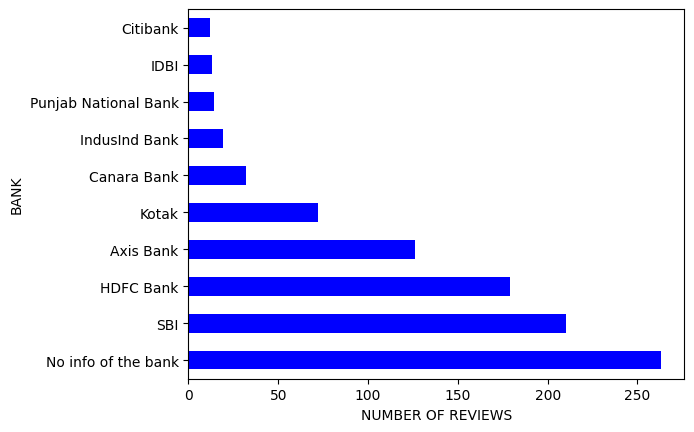

In [19]:
# Plot the number of positive and negative reviews for each app
plt.figure(figsize=(13, 5))
bank_review[['bank_name','sentiment']].plot(kind = 'barh', x = 'bank_name', y = 'sentiment', color = 'blue', legend = False)
plt.ylabel('BANK')
plt.xlabel('NUMBER OF REVIEWS')

=> The majority of the reviews didn't mention the name of the bank. However SBI BI has the second most reviews, followed by HDFC, ICICI, and AXIS

In [20]:
#drop the no information banks
df_banks = result_df.drop(result_df[result_df['bank_name'] == 'No info of the bank'].index)
df_banks.head()

,sentence,sentiment,score,bank_name
0,State Bank Of India is located nearby in our a...,POSITIVE,0.993380,SBI
1,"I have my salary account in SBI, when I applie...",POSITIVE,0.999430,SBI
2,I am using Axis bank saving account for the p...,POSITIVE,0.970742,Axis Bank
3,I have my salary bank account in HDFC bank for...,POSITIVE,0.982048,HDFC Bank
5,I am not getting an alert message from IDBI ba...,NEGATIVE,0.997882,IDBI


In [21]:
# find out which app has the most positive reviews and which app has the most negative reviews
positive_reviews = df_banks[df_banks['sentiment'] == 'POSITIVE'].groupby('bank_name')['sentiment'].count().sort_values(ascending=False).reset_index()
negative_reviews = df_banks[df_banks['sentiment'] == 'NEGATIVE'].groupby('bank_name')['sentiment'].count().sort_values(ascending=False).reset_index()
# rename to diffrentiate between positive and negative reviews
negative_reviews.rename(columns={'sentiment': 'negative_reviews'}, inplace=True)
positive_reviews.rename(columns={'sentiment': 'positive_reviews'}, inplace=True)
# merge into 1 dataframe
df_compare_reviews  = positive_reviews.merge(negative_reviews, on='bank_name', how='outer').fillna(0)
# sort the dataframe by positive reviews in descending order
df_compare_reviews.sort_values(ascending=False, by = 'positive_reviews', inplace = True)
df_compare_reviews

,bank_name,positive_reviews,negative_reviews
8,SBI,110,100
3,HDFC Bank,101,78
0,Axis Bank,57,69
6,Kotak,31,41
1,Canara Bank,16,16
5,IndusInd Bank,9,10
7,Punjab National Bank,7,7
4,IDBI,6,7
2,Citibank,5,7


Text(0.5, 0, 'REVIEWS')

<Figure size 1000x800 with 0 Axes>

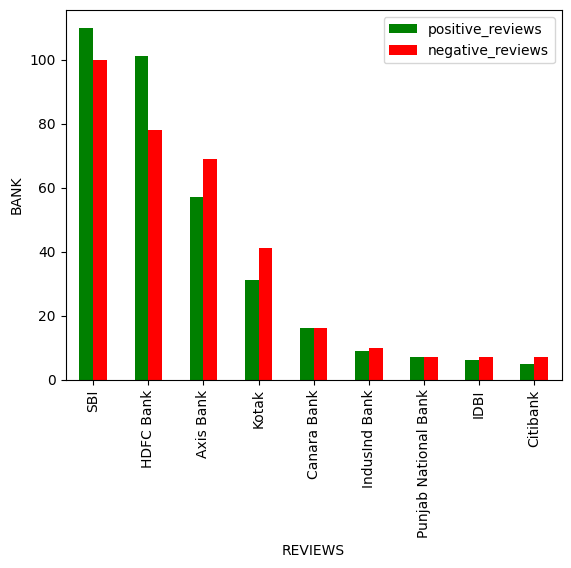

In [22]:
# visualize
plt.figure(figsize=(10, 8))
df_compare_reviews[['bank_name','positive_reviews','negative_reviews']].plot(kind = 'bar',
                                                                            x = 'bank_name', y = ['positive_reviews','negative_reviews'],
                                                                            color = ['green','red'], legend = True, linewidth = 10).figure
plt.ylabel('BANK')
plt.xlabel('REVIEWS')

=> As we can see , SBI has the most positive reviews and the most negative reviews. This means that this bank has a lot of users who love it and the opposite was true for the others . This is a bad sign for the bank, as despite the positive reviews, there are still many negative ones. This could indicate that the bank is not meeting the needs of all its users, or that there are issues that are not being addressed.